In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline


Connect datasets    


In [2]:
df = pd.read_csv(f'../Dataset/EasyVisa.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.describe()


,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Exploring Data

In [5]:
## Define numerical and Categorical data

numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object_]).columns

In [6]:
print('We have {} numerical_features : {}' .format(len(numerical_features), numerical_features))

print('We have {} categorical_features : {}' .format(len(categorical_features), categorical_features))



We have 3 numerical_features : Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')
We have 9 categorical_features : Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


In [7]:
# Proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-----------------------------------')


case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
-----------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-----------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-----------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-----------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-------------------------------

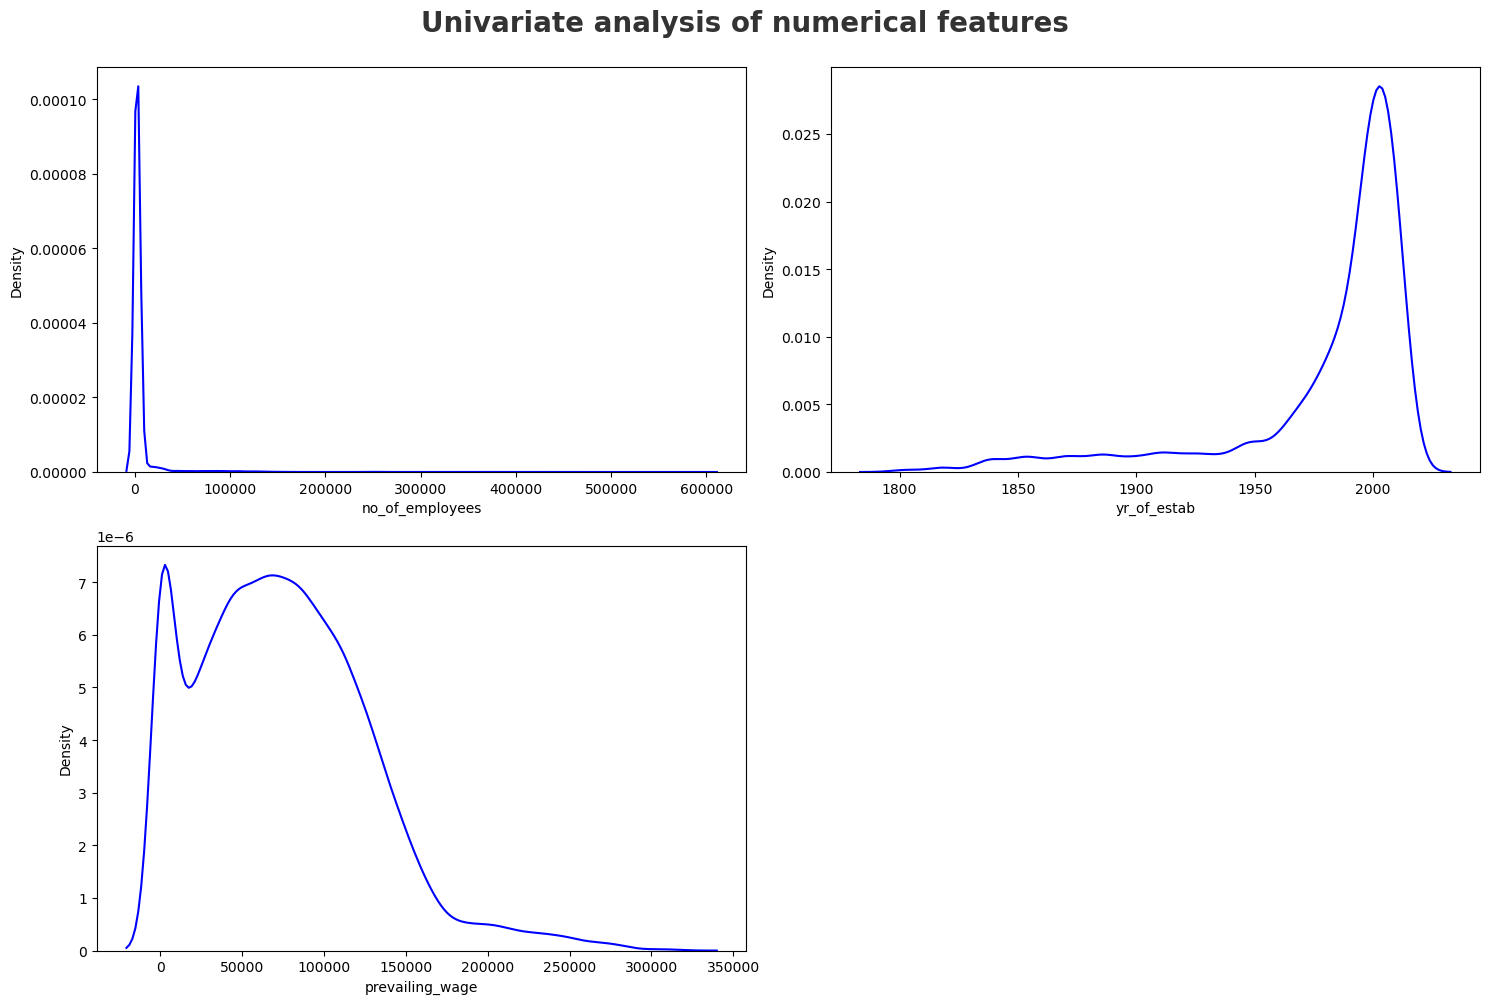

In [9]:
# Univariate distributions analysis

# Bivariate and Multivariate distributions  analysis

#Numerical feature

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate analysis of numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()


Number of employees and privailing_wage has skewness issue. yr_of_estab has discrete value.

##Categorical features

In [12]:
categorical_features = categorical_features.drop('case_id')

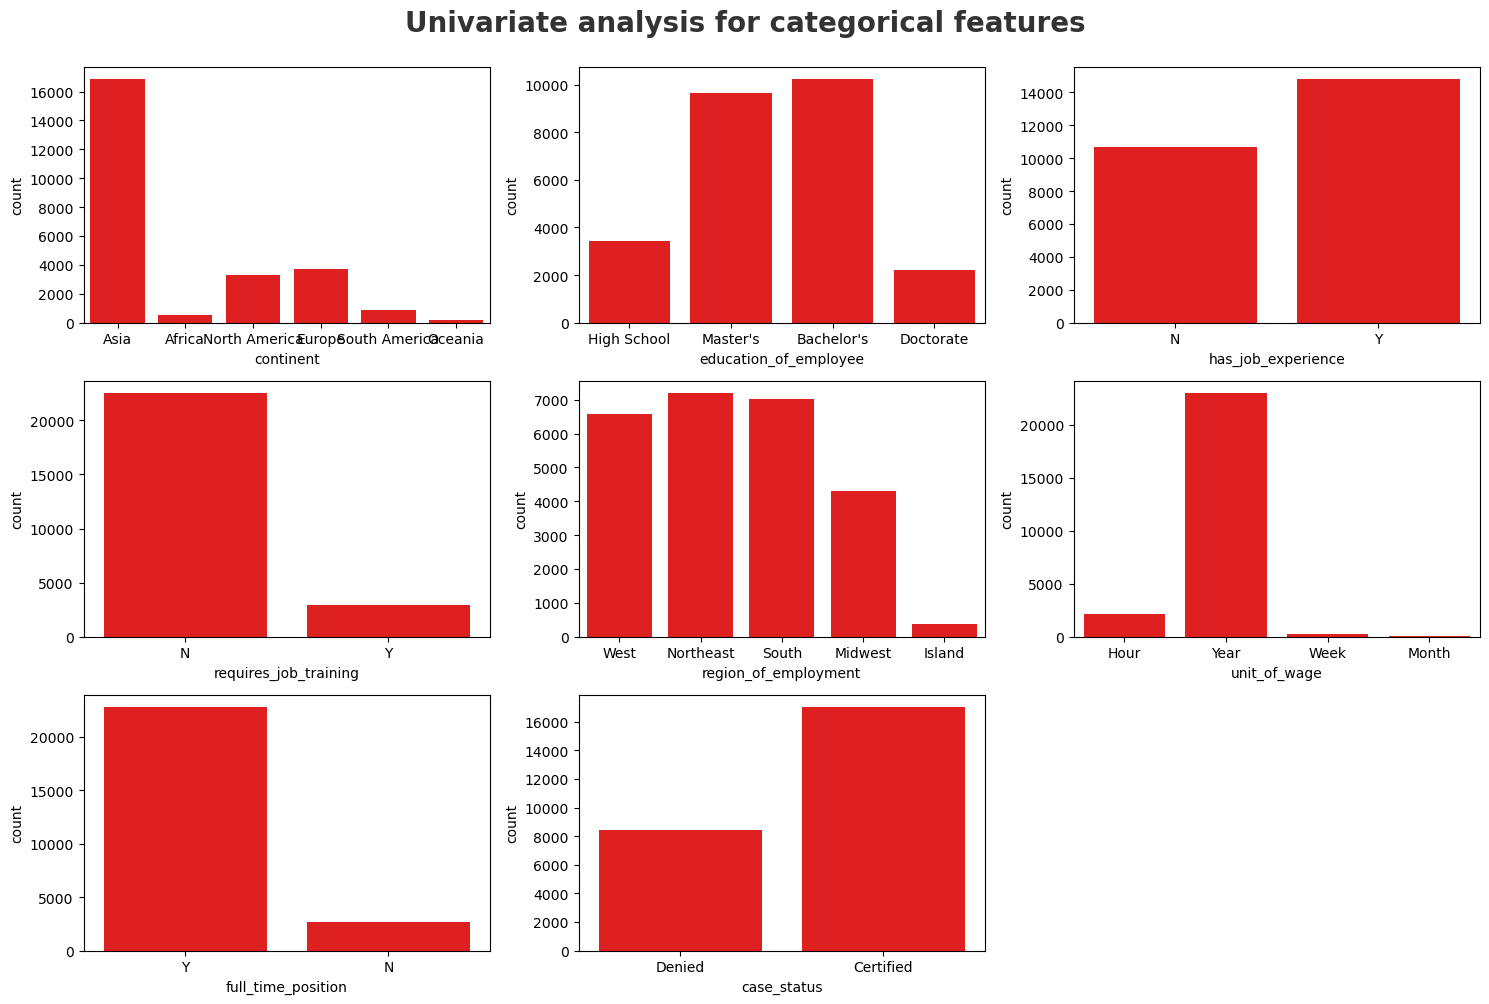

In [45]:

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate analysis for categorical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)



for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]], color='red')
    plt.xlabel(categorical_features[i])
    plt.tight_layout()


## Insights
       requires_job_training, unit_of_wag, full_time_position, continent are imbalanced and rest features are balanced.


In [15]:
## Multivariate Analysis
### *Analysis of more then one numerical_features

###Seperating descrete features and contineous features

descrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=25]

continous_features = [feature for feature in numerical_features if feature not in descrete_features]

print('We have {} discrete_features : {}' .format(len(descrete_features), descrete_features))

print('We have {} continous_features : {}' .format(len(continous_features), continous_features))


We have 0 discrete_features : []
We have 3 continous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


## Multicollinearity Analysis of numerical features


In [16]:
df.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### There is no multicoliinearity between any numeric features.

## Multicollinearity in categorical features
*CHI-Square test


    A statistical hypothesis test that is true for all those features in the dataset that are categorical in the dataset.

    chi-square statistic is a way to show relationship between two categorical features.

    Heare we test correllation of categorical features with target coulmn.

    


Null hypothesis(H0) The feature is independent of target column (No-Correlation)

Alternative hypothesis(H1) The feature is not independent of target column (Correlation)


In [24]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features :
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1]<0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


### 'requires_job_training' fails to reject null hypothesis means it does not correlate with target column.


In [26]:
## checking null values
df.isnull().sum()


case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

##### There is no null values in any column in dataset.

#### Load again the contineus feature


In [46]:
contineous_features =[feature for feature in numerical_features if len(df[feature].unique())>=10]
print('Number of contineous features : ', contineous_features)

Number of contineous features :  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


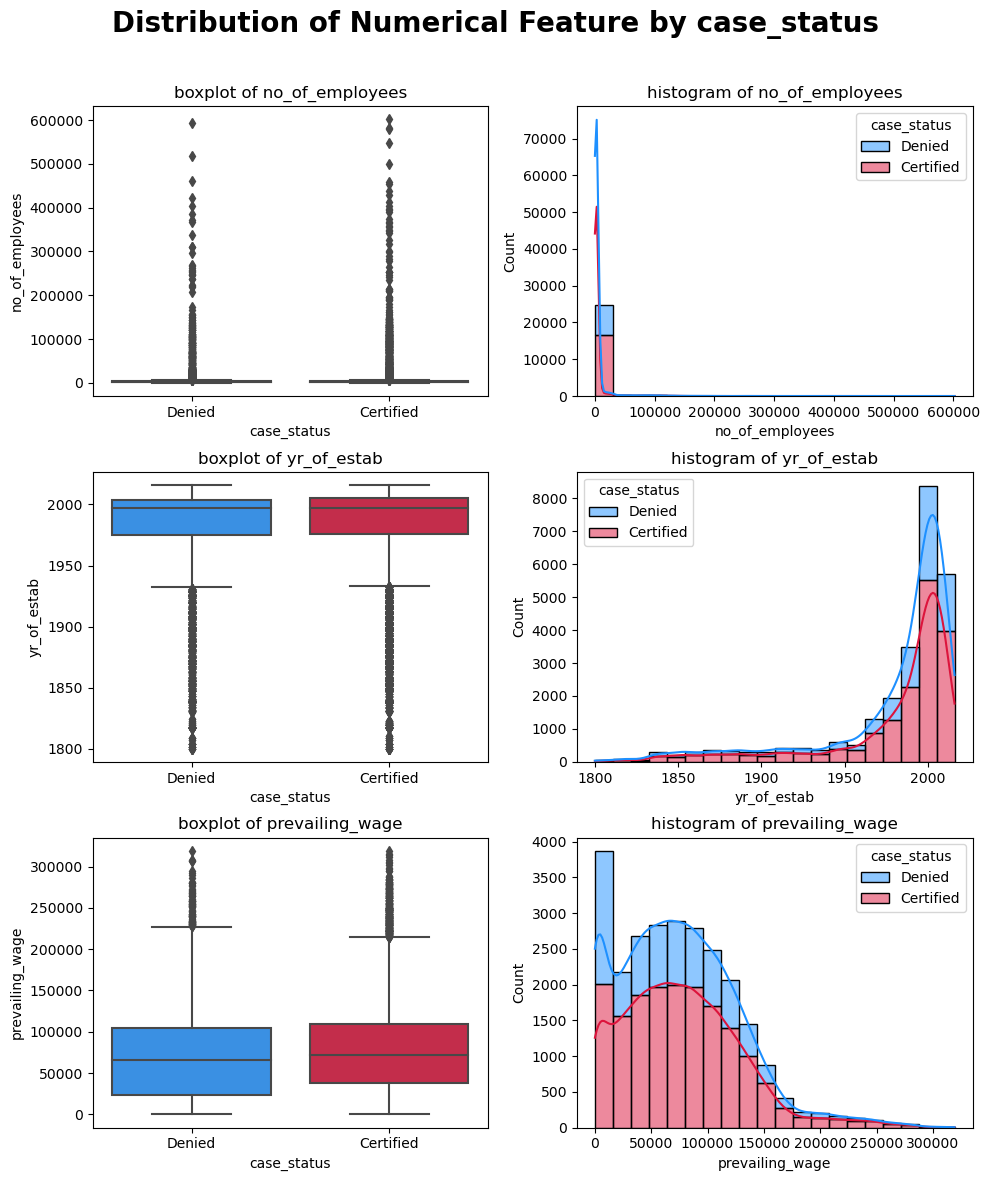

In [44]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Feature by case_status', fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(contineous_features):
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins = 20, kde=True, multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'histogram of {col}', fontsize=12)   
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
                    

## Initial analysis report
#### No. of employees is right skewed and has many outliers that can be handled in feature engineering.
#### yr_of_estab is left skewed and below the lower bound of boxplot has some outliers.
#### prevailing_wage is right skewed and some outliesr above the upper bound of boxplot.
#### There is no missing values in dataset.
#### The case_id column can be deleted because each row has unique values.
#### The case_status column is the target value to predict.
#### In the categorical column features cn be made binary numerical in feature enginnering.
